<a href="https://colab.research.google.com/github/dansssvvx/Tubes-Pemsis/blob/main/PEMSIS_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Pengaruh Jenis Pemanggangan (Roast Type) terhadap Harga Kopi Menggunakan One-Way ANOVA

### Anggota Kelompok:
#### Ahmad Ramadhani R [F1D02310102]
#### Ajeng Sakinah Wulandari [F1D022001]
#### Azizah Nurul Indah Amriani [F1D02310004]
#### Sucitasari Rahmadani [F1D02310138]
#### Zahra Tri Lusiana [F1D022162]


###Asumsi awal (Hipotesis)
#### H0 = Tidak terdapat perbedaan antara Jenis Pemanggangan (Roast Type) dengan Harga Kopi

#### H1 = Terdapat perbedaan antara Jenis Pemanggangan (Roast Type) dengan Harga Kopi

## Import Library

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Load Data

In [52]:
!git clone https://github.com/dansssvvx/Tubes-Pemsis.git

fatal: destination path 'Tubes-Pemsis' already exists and is not an empty directory.


In [53]:
dataset = ("/content/Tubes-Pemsis/kopi.csv")

In [66]:
df = pd.read_csv(dataset)

#nama kolom tidak dianggap
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [55]:
n = df["unit_price"].count()
print(n)

48


karena banyak data (n) adalah 45, maka metode yang digunakan untuk uji normalitas data adalah shapiro-wilk

In [56]:
print("Statistik Deskriptif:")
print(df.groupby('roast_type')['unit_price'].describe())

Statistik Deskriptif:
            count      mean        std    min      25%    50%       75%  \
roast_type                                                                
D            16.0  11.55000   8.936883  2.685  4.99875   8.36  14.85875   
L            16.0  14.59500  11.147916  3.585  6.56625  10.73  18.75875   
M            16.0  12.99375  10.066656  2.985  5.56875   9.34  16.63375   

               max  
roast_type          
D           29.785  
L           36.455  
M           33.465  


## Uji Normalitas

In [57]:
print("Uji Normalitas kelompok data:")
for level in df['roast_type'].unique():
    data = df[df['roast_type'] == level]['unit_price']
    stat, p = stats.shapiro(data)
    print(f"{level}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Tidak Normal)'}")

Uji Normalitas kelompok data:
L: p-value = 0.0105 (Tidak Normal)
M: p-value = 0.0132 (Tidak Normal)
D: p-value = 0.0134 (Tidak Normal)


Karena seluruh kelompok data tidak normal, maka digunakan metode levene untuk uji homogenitas

## Uji Homogenitas

In [58]:
groups = [df[df['roast_type'] == level]['unit_price']
          for level in df['roast_type'].unique()]
levene_stat, levene_p = stats.levene(*groups)
print(f"\nUji Homogenitas Varians (Levene): p-value = {levene_p:.4f} {'(Homogen)' if levene_p > 0.05 else '(Tidak Homogen)'}")


Uji Homogenitas Varians (Levene): p-value = 0.8052 (Homogen)


Karena nilai p-value > 0.05(data homogen), maka uji ANOVA dapat dilakukan untuk dataset

## Uji Anova

In [59]:
model = ols('unit_price ~ C(roast_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nHasil ANOVA:")
print(anova_table)


Hasil ANOVA:
                    sum_sq    df         F    PR(>F)
C(roast_type)    74.242350   2.0  0.364551  0.696541
Residual       4582.222375  45.0       NaN       NaN


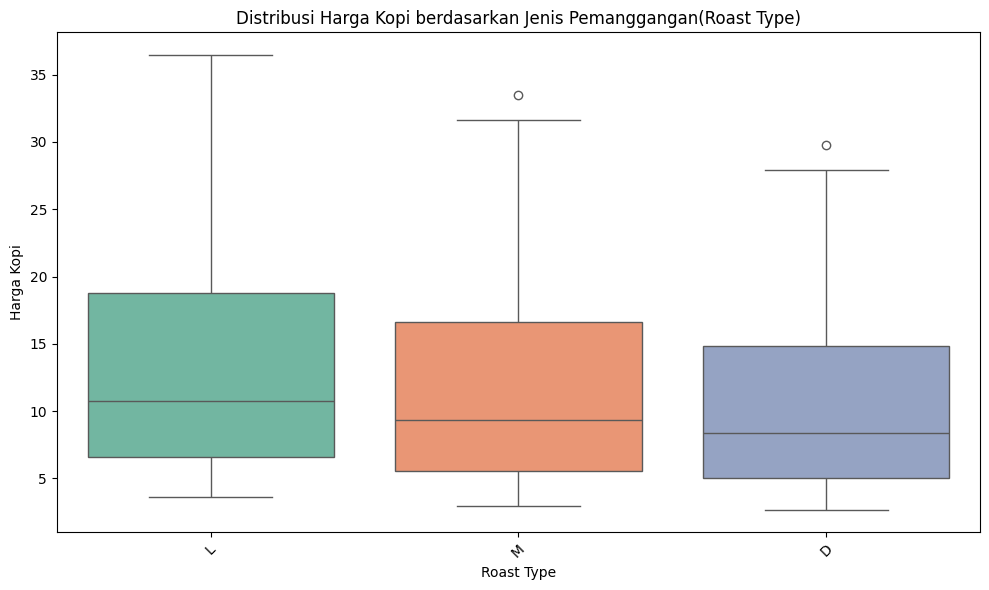

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='roast_type', y='unit_price', hue='roast_type', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribusi Harga Kopi berdasarkan Jenis Pemanggangan(Roast Type)')
plt.xlabel('Roast Type')
plt.ylabel('Harga Kopi')
plt.tight_layout()
plt.show()

In [61]:
p_val_anova = anova_table['PR(>F)'].iloc[0]
if p_val_anova < 0.05:
    print(f"\nKesimpulan: Terdapat perbedaan signifikan terhadap harga kopi berdasarkan jenis pemanggangan (roast type) (p = {p_val_anova:.6f})")
else:
    print(f"\nKesimpulan: Tidak ada perbedaan signifikan terhadap harga kopi berdasarkan jenis pemanggangan (roast type) (p = {p_val_anova:.6f})")


Kesimpulan: Tidak ada perbedaan signifikan terhadap harga kopi berdasarkan jenis pemanggangan (roast type) (p = 0.696541)


Tidak terdapat perbedaan yang signifikan antara Jenis Pemanggangan dengan harga kopi yang dihitung dari beberapa kelompok

Maka hipotesis yang diterima = H0

In [62]:
# df = pd.read_excel("kopi.xlsx")

# # Tampilkan struktur kolom dan 5 baris pertama
# print(df.info())
# # 1. Filter hanya kolom yang dibutuhkan
# df_anova = df[['Roast Type', 'Price per 100g']].copy()

# # 2. Hapus baris yang memiliki nilai kosong (jika ada)
# df_anova = df_anova.dropna()

# # 3. Lihat nilai unik Roast Type
# print("Kategori Roast Type:", df_anova['Roast Type'].unique())

# # 4. Lihat ringkasan data
# print(df_anova.describe())
# print(df.head())

In [63]:
# # 1. Filter hanya kolom yang dibutuhkan
# df_anova = df[['Roast Type', 'Price per 100g']].copy()

# # 2. Hapus baris yang memiliki nilai kosong (jika ada)
# df_anova = df_anova.dropna()

# # 3. Lihat nilai unik Roast Type
# print("Kategori Roast Type:", df_anova['Roast Type'].unique())

# # 4. Lihat ringkasan data
# print(df_anova.describe())

# # 1. Salin data dan hitung z-score untuk kolom Price per 100g
# df_anova['zscore'] = zscore(df_anova['Price per 100g'])

# # 2. Uji Kolmogorov-Smirnov per kelompok roast
# for group in df_anova['Roast Type'].unique():
#     z_group = df_anova[df_anova['Roast Type'] == group]['zscore']
#     stat, p = kstest(z_group, 'norm')
#     print(f"K-S Test untuk {group}: p-value = {p:.5f} {'✅ Normal' if p > 0.05 else '❌ Tidak normal'}")


In [64]:
# # Ambil data per kelompok
# groups = [df_anova[df_anova['Roast Type'] == group]['Price per 100g'] for group in df_anova['Roast Type'].unique()]

# # Uji homogenitas variansi (Levene's test)
# levene_stat, levene_p = levene(*groups)
# print(f"Levene’s Test: p-value = {levene_p:.5f} {'✅ Homogen' if levene_p > 0.05 else '❌ Tidak homogen'}")

In [65]:
# # Bangun model OLS (Ordinary Least Squares)
# model = ols('Q("Price per 100g") ~ C(Q("Roast Type"))', data=df_anova).fit()

# # Hitung ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)

# # Tampilkan hasil
# print("📊 Tabel ANOVA:")
# print(anova_table)

#BATASAN

In [38]:
# df.rename(columns={'Roast Type': 'roast_type', 'Price per 100g': 'price_per_100g'}, inplace=True)

# # Ambil hanya kolom yang relevan dan buang data yang kosong
# df = df[['roast_type', 'price_per_100g']].dropna()
# df['price_per_100g'] = pd.to_numeric(df['price_per_100g'], errors='coerce')
# df.dropna(subset=['price_per_100g'], inplace=True)

In [39]:
# ks_results = {}
# for tipe in df['roast_type'].unique():
#     sample = df[df['roast_type'] == tipe]['price_per_100g']
#     stat, p = kstest(sample, 'norm', args=(sample.mean(), sample.std()))
#     ks_results[tipe] = (stat, p)

In [40]:
# groups = [df['price_per_100g'][df['roast_type'] == t] for t in df['roast_type'].unique()]
# levene_stat, levene_p = levene(*groups)

In [41]:
# plt.figure(figsize=(10, 6))
# sns.stripplot(x='roast_type', y='price_per_100g', data=df, jitter=True, alpha=0.7)
# plt.title('Scatter Plot: Price per 100g berdasarkan Tipe Roast')
# plt.ylabel('Harga per 100g')
# plt.xlabel('Tipe Roast')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# ks_results, (levene_stat, levene_p)

In [42]:
# stat, p = f_oneway(*grup)
# print(f"One Way ANOVA p = {p:.4f}")
# if p < 0.05:
#     print("➡️ Ada perbedaan signifikan harga antar roast type!")
# else:
#     print("➡️ Tidak ada perbedaan signifikan harga antar roast type.")

In [43]:
# df = df[['Roast Type', 'Price per 100g']].dropna()
# df['Price per 100g'] = pd.to_numeric(df['Price per 100g'], errors='coerce')
# df.dropna(subset=['Price per 100g'], inplace=True)

In [44]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Roast Type', y='Price per 100g', data=df)
# plt.title('Harga per 100g berdasarkan Tipe Roast')
# plt.xticks(rotation=45)
# plt.show()

In [45]:
# plt.figure(figsize=(10, 6))
# sns.stripplot(x=kolom_grup, y=kolom_nilai, data=df, jitter=True, alpha=0.7)
# plt.title(f'Scatter Plot: {kolom_nilai.title()} vs {kolom_grup.title()}', fontsize=16)
# plt.ylabel('Harga per 100g')
# plt.xlabel('Tipe Roast')
# plt.show()

In [46]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=kolom_grup, y=kolom_nilai, data=df)
# plt.title(f'Boxplot: Perbandingan Harga per 100g untuk Setiap Tipe Roast', fontsize=16)
# plt.ylabel('Harga per 100g')
# plt.xlabel('Tipe Roast')
# plt.show()

In [47]:
# # Membuat list yang berisi data harga untuk setiap tipe roast
# kelompok_data = [df[kolom_nilai][df[kolom_grup] == grup] for grup in df[kolom_grup].unique()]

# # Menjalankan Levene's Test
# stat_levene, p_levene = levene(*kelompok_data)

# print(f"P-value Uji Levene: {p_levene:.4f}")

# if p_levene < 0.05:
#     print("⚠️ Asumsi homogenitas varian TIDAK TERPENUHI (p < 0.05).")
# else:
#     print("✅ Asumsi homogenitas varian TERPENUHI (p >= 0.05).")

In [48]:
# # Membuat dan fitting model ANOVA
# model = ols(f'{kolom_nilai} ~ C({kolom_grup})', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# print("\n--- Hasil Analisis Varian (ANOVA) ---")
# print(anova_table)

In [49]:
# p_value_anova = anova_table['PR(>F)'][0]

# if p_value_anova < 0.05:
#     print("\n--- Hasil ANOVA Signifikan, Lanjut ke Uji Post-Hoc Tukey HSD ---")
#     tukey_hsd = pairwise_tukeyhsd(endog=df[kolom_nilai], groups=df[kolom_grup], alpha=0.05)
#     print(tukey_hsd)
# else:
#     print("\n--- Hasil ANOVA Tidak Signifikan, Uji Post-Hoc Tidak Diperlukan ---")

In [50]:
# # Mendapatkan residuals dari model
# residuals = model.resid

# # Menjalankan Uji Kolmogorov-Smirnov
# ks_stat, p_ks = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))

# print(f"\n--- Uji Normalitas Residuals (Kolmogorov-Smirnov) ---")
# print(f"P-value: {p_ks:.4f}")

# if p_ks < 0.05:
#     print("⚠️ Asumsi normalitas TIDAK TERPENUHI (p < 0.05).")
# else:
#     print("✅ Asumsi normalitas TERPENUHI (p >= 0.05).")

# # Visualisasi dengan Q-Q Plot untuk pengecekan tambahan
# sm.qqplot(residuals, line='s')
# plt.title('Q-Q Plot of Residuals')
# plt.show()